6. Напишите функцию stochastic_gradient_descent, реализующую стохастический градиентный спуск для линейной регрессии. Функция принимает на вход следующие аргументы:

•features - матрица, соответствующая обучающей выборке

•w_init - вектор начальных весов модели

•eta - шаг градиентного спуска (по умолчанию 0.001)

•max_iter - максимальное число итераций градиентного спуска (по умолчанию 10000)

•max_weight_dist - минимальное евклидово расстояние между векторами весов на соседних итерациях градиентного спуска, при котором алгоритм прекращает работу (по умолчанию 1e-8)

•seed - число, используемое для воспроизводимости сгенерированных псевдослучайных чисел (по умолчанию 42)

•verbose - флаг печати информации (например, для отладки, по умолчанию False)

На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки.

Функция должна возвращать вектор весов w, а также вектор (список) ошибок, число итераций


In [1]:
import pandas as pd
import numpy as np
from time import time

In [2]:
def softmax(x):
    return np.exp(x)/np.sum(np.exp(x))

In [3]:
def G_step(df, features, w, b_size, verbose=False):
    """ features = matrix n x i where n = number of the horse, i = feature of the horse
        winer  = vector n where there is only one non zesos in the position winer's horse
        eta = size of the step
        return the step of gradient decent 
    """
    if verbose:
        print 'SG_step'
        print 'shape of data  ',data.shape
        print 
    df['S'] = df.ix[:,features].dot(w)
    df['p'] = df['S'].groupby(by =df['event_id']).apply(softmax)
    df['winer'] = df['result'].apply(lambda x: 1 if x==1 else 0)
    grad = np.dot(df['winer'] -df['p'], df[features])/b_size
    
    return grad 

In [4]:
def G_step_svm(df, features, w, verbose=False):
    """ features = matrix n x i where n = number of the horse, i = feature of the horse
        winer  = vector n where there is only one non zesos in the position winer's horse
        eta = size of the step
        return the step of gradient decent 
    """
    if verbose:
        print 'SG_step'
        print 'shape of data  ',data.shape
        print 
    S = (df.ix[:,features].dot(w)).values
    p = softmax(S)
    winner_mask = (df['result'] ==1).values
    winner = winner_mask.astype(int)
    P_winer = p[winner_mask]
    grad = np.dot(winner -p, df[features])*P_winer/np.power(1-P_winer,2)
    
    return -1*grad 

In [5]:
def G_step_exp_svm(df, features, w, verbose=False):
    """ features = matrix n x i where n = number of the horse, i = feature of the horse
        winer  = vector n where there is only one non zesos in the position winer's horse
        eta = size of the step
        return the step of gradient decent 
    """
    if verbose:
        print 'SG_step'
        print 'shape of data  ',data.shape
        print 
    S = (df.ix[:,features].dot(w)).values
    p = softmax(S)
    winner_mask = (df['result'] ==1).values
    winner = winner_mask.astype(int)
    P_winer = p[winner_mask]
    grad_P = np.dot(winner -p, df[features])*P_winer/np.power(1-P_winer,2)
    marging = np.exp(1- P_winer/(1-P_winer))
    
    return -1*np.exp(1- P_winer/(1-P_winer))*grad_P

In [6]:
def stochastic_gradient_descent(data, features,  b_size =100, eta=1e-3, moment = 0.85, la = 5.,
                                max_iter=1e3,  min_weight_dist=1e-5, seed=42, verbose=False):
    
    
    # Инициализируем расстояние между векторами весов на соседних
    # итерациях большим числом. 
    weight_dist = np.inf
    # Будем порождать псевдослучайные числа 
    # (номер объекта, который будет менять веса), а для воспроизводимости
    # этой последовательности псевдослучайных чисел используем seed.
    #np.random.seed(seed)
    
    w = np.random.randn(len(features))
    
    # Счетчик итераций
    iter_num = 0
    # массив изменения градиента
    grad_norm = np.zeros(max_iter+1)
    # значение последнего градиента
    last_grad = np.zeros_like(w)
        
    # Основной цикл
    while (weight_dist > min_weight_dist) and (iter_num < max_iter):
        
        # выберем случайно скачки количеством = b_size
        r_event = np.random.choice(np.unique(data['event_id']), size = b_size)
        
        df = data.ix[np.in1d(data['event_id'], r_event),:]
        #df['S'] = df.ix[:,features].dot(w)
        #df['p'] = df['S'].groupby(by =df['event_id']).apply(softmax)
        #df['WIN'] = df['result'].apply(lambda x: 1 if x==1 else 0)
        #grad = np.dot(df['WIN'] -df['p'], df[features])/b_size
        
        last_grad = moment*last_grad -G_step(df, features, w, b_size) + la *w # градиентный шаг с моментом + регуляризатор
        w = w - eta* last_grad
        
        weight_dist = np.linalg.norm(last_grad, ord=2)
        if (weight_dist <= min_weight_dist):
            print 'SGD covergence'
        
        iter_num +=1
        grad_norm [iter_num]   = weight_dist 
        #weight_dist = grad_norm[-2] +grad_norm[-1]
        if verbose:
            #print 'w  ', w
            print 'iteration', iter_num, 'dist ',weight_dist
        
        if iter_num > 300:
            eta = eta/10.
        elif iter_num > 600:
            eta = eta/10.
        #eta = eta/np.square(iter_num+1) # переменный шаг
         
        if np.any(w == np.nan):
            print "w overcome"
            break
        
    return w, grad_norm , iter_num

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
data = pd.read_csv('racehorse_data.csv', index_col=[0])
data.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f54,f55,f56,f57,runner_id,result,event_id,is1,is2,oos
0,0.064913,1.395654,-0.152068,0.008172,0.0007,0.971937,1.096287,-0.003309,1.761018,0.968297,...,0.040241,-0.003450,-0.003327,0.036781,353046,3,287398,True,True,False
1,-0.250759,1.137530,0.019747,0.008894,0.0007,0.398019,0.481980,-0.002772,1.682896,0.354919,...,0.179168,-0.002913,-0.002791,0.213007,352217,5,287398,True,True,False
2,-0.250759,1.029570,-0.145221,-0.020776,0.0007,0.307072,0.427015,-0.012089,1.165470,0.440719,...,0.217412,-0.012249,-0.012108,-0.173009,342962,13,287398,True,True,False
3,0.064913,1.395654,-0.136884,-0.020776,0.0007,0.234280,0.361007,0.009897,0.880806,1.230350,...,0.399248,0.009783,0.009877,0.326784,361432,1,287398,True,True,False
4,0.064913,1.343377,0.242782,0.008894,0.0007,-0.017472,-0.199782,0.004808,0.481565,1.404777,...,-0.325201,0.004683,0.004789,-0.145831,359420,6,287398,True,True,False


In [14]:
features =data.ix[:,'f1':'f57'].columns

In [15]:
%time SGD1 = stochastic_gradient_descent(data.ix[data.is1,:], features, b_size =100, eta = 1e-3, moment = 0.9, verbose=False)

C:\Users\User\Anaconda2\lib\site-packages\ipykernel\__main__.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\User\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\User\Anaconda2\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\User\Anaconda2\lib\site-packages\ipykernel\__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

Wall time: 3min 24s


In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

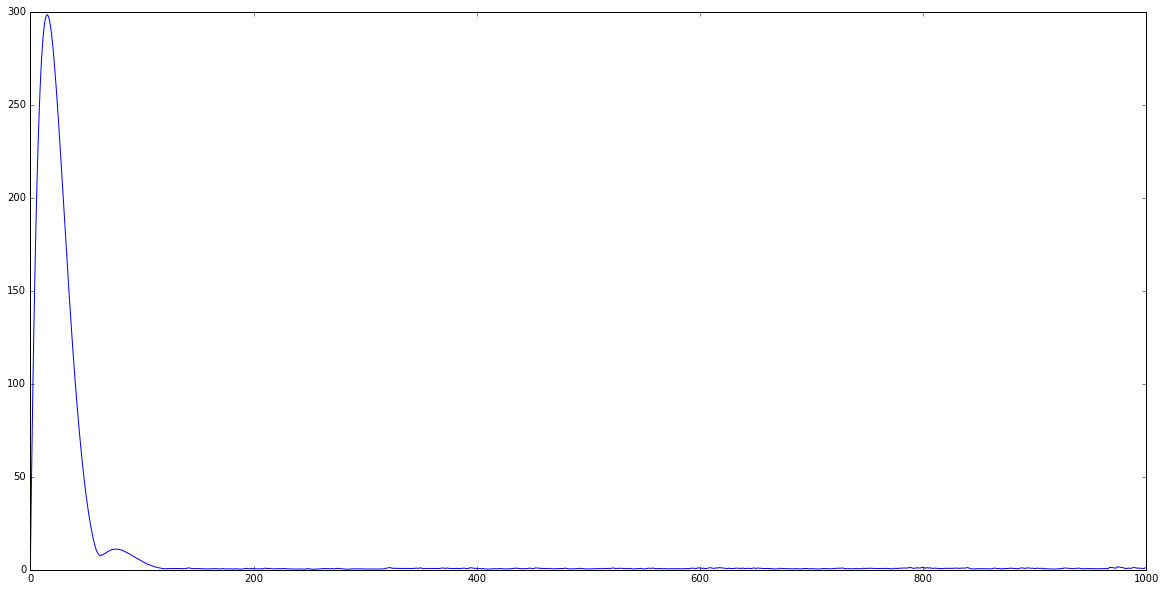

In [17]:
plt.figure(figsize=(20, 10))
plt.plot(SGD1[1])
plt.show()

In [17]:
%time SGD2 = stochastic_gradient_descent(data.ix[data.is1,:], features, b_size =100, eta = 1e-3, moment = 0.85, verbose=False)

C:\Users\User\Anaconda2\lib\site-packages\ipykernel\__main__.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\User\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\User\Anaconda2\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\User\Anaconda2\lib\site-packages\ipykernel\__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

Wall time: 3min 45s


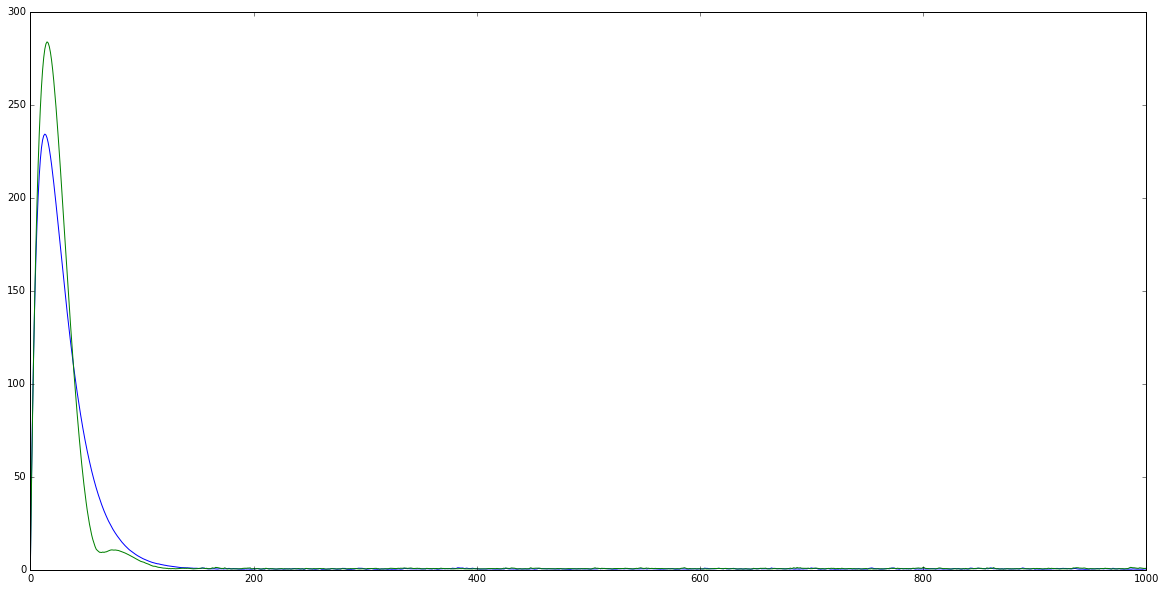

In [18]:
plt.figure(figsize=(20, 10))
plt.plot(SGD2[1])
plt.plot(SGD1[1])
plt.show()

In [19]:
%time SGD3 = stochastic_gradient_descent(data.ix[data.is1,:], features, b_size =100, eta = 1e-3, moment = 0.8, verbose=False)

C:\Users\User\Anaconda2\lib\site-packages\ipykernel\__main__.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\User\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\User\Anaconda2\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\User\Anaconda2\lib\site-packages\ipykernel\__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

Wall time: 3min 29s


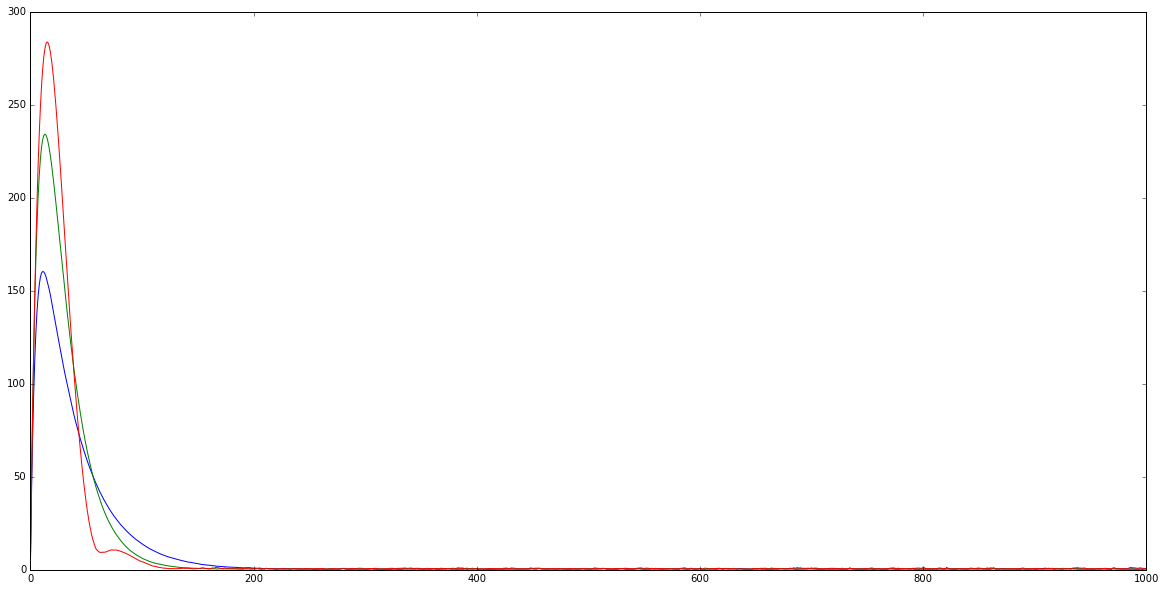

In [20]:
plt.figure(figsize=(20, 10))
plt.plot(SGD3[1])
plt.plot(SGD2[1])
plt.plot(SGD1[1])
plt.show()

In [18]:
W = SGD1[0]
def LL (data, features, w):
    
    S = (data.ix[:,features].dot(w)).values
    P = softmax(S)
    p_winer = P[(data['result']==1).values]
    return np.log(p_winer)

In [19]:
data.groupby(by =data['event_id']).apply(lambda x: LL(x, features, W)).mean()

array([-2.08598487])

In [20]:
for i in range(10):
    
    W1 = np.random.normal(loc =W, scale =0.01, size =(len(features)))
    print data.groupby(by =data['event_id']).apply(lambda x: LL(x, features, W1)).mean()

[-2.09697666]
[-2.10068337]
[-2.08619063]
[-2.10861129]
[-2.08195373]
[-2.076911]
[-2.0823253]
[-2.08929633]
[-2.07666996]
[-2.0847946]


In [21]:
def stochastic_gradient_descent_svm(data, features, b_size =100, eta=1e-3, moment = 0.85, la = 5.,
                                max_iter=1e3,  min_weight_dist=1e-5, seed=42, verbose=False):
    
    
    # Инициализируем расстояние между векторами весов на соседних
    # итерациях большим числом. 
    weight_dist = np.inf
    # Будем порождать псевдослучайные числа 
    # (номер объекта, который будет менять веса), а для воспроизводимости
    # этой последовательности псевдослучайных чисел используем seed.
    #np.random.seed(seed)
    
    w = np.random.randn(len(features))
    
    # Счетчик итераций
    iter_num = 0
    # массив изменения градиента
    grad_norm = np.zeros(max_iter+1)
    # значение последнего градиента
    last_grad = np.zeros_like(w)
        
    # Основной цикл
    while (weight_dist > min_weight_dist) and (iter_num < max_iter):
        
        # выберем случайно скачки количеством = b_size
        r_event = np.random.choice(np.unique(data['event_id']), size = b_size)
        
        df = data.ix[np.in1d(data['event_id'], r_event),:]
        grad_events = df.groupby(df['event_id']).apply(lambda x: G_step_exp_svm(x, features, w)).mean()
        #grad_events = df.groupby(df['event_id']).apply(lambda x: G_step_svm_log(x, features, w)).mean()
                                                       
        last_grad = moment*last_grad +grad_events + la *w # градиентный шаг с моментом + регуляризатор
        w = w - eta* last_grad
        
        weight_dist = np.linalg.norm(last_grad, ord=2)
        if (weight_dist <= min_weight_dist):
            print 'SGD covergence'
        
        iter_num +=1
        grad_norm [iter_num]   = weight_dist 
        #weight_dist = grad_norm[-2] +grad_norm[-1]
        if verbose:
            #print 'w  ', w
            print 'iteration', iter_num, 'dist ',weight_dist
        
        if iter_num > 300:
            eta = eta/10.
        elif iter_num > 600:
            eta = eta/10.
        #eta = eta/np.square(iter_num+1) # переменный шаг
         
        if np.any(w == np.nan):
            print "w overcome"
            break
        
    return w, grad_norm , iter_num

In [22]:
%time svm_SGD = stochastic_gradient_descent_svm(data[data.is1], features)

C:\Users\User\Anaconda2\lib\site-packages\ipykernel\__main__.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Wall time: 4min 23s


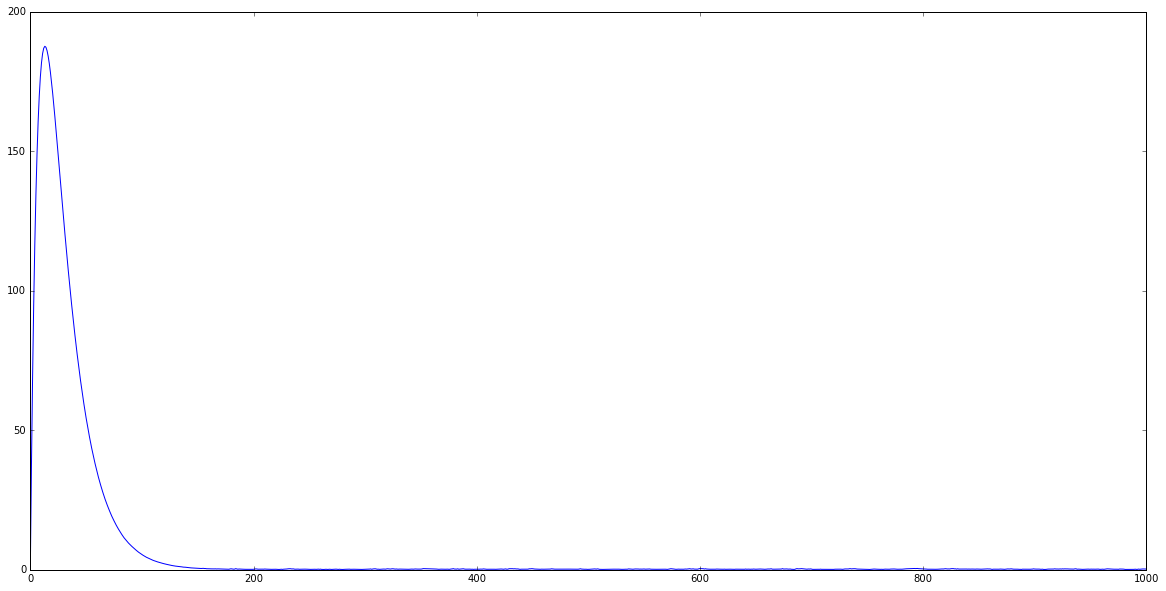

In [23]:
plt.figure(figsize=(20, 10))
plt.plot(svm_SGD[1])
plt.show()

In [24]:
W_svm = svm_SGD[0]
data.groupby(by =data['event_id']).apply(lambda x: LL(x, features, W_svm)).mean()

array([-2.13837669])

In [25]:
def svm_distance(data, features, w):
    
    S = (data.ix[:,features].dot(w)).values
    P = softmax(S)
    p_winer = P[(data['result']==1).values]
    return p_winer/(1-p_winer)

In [26]:
data.groupby(by =data['event_id']).apply(lambda x: svm_distance(x, features, W_svm)).mean()

array([ 0.15060057])

In [27]:
for i in range(10):
    
    W1 = np.random.normal(loc =W_svm, scale =0.01, size =(len(features)))
    print data.groupby(by =data['event_id']).apply(lambda x: svm_distance(x, features, W1)).mean()

[ 0.14934554]
[ 0.15273962]
[ 0.14925028]
[ 0.15156209]
[ 0.15100307]
[ 0.14678557]
[ 0.15061156]
[ 0.15015984]
[ 0.15197272]
[ 0.15123717]


In [28]:
def G_step_svm_log(df, features, w, verbose=False):
    """ features = matrix n x i where n = number of the horse, i = feature of the horse
        winer  = vector n where there is only one non zesos in the position winer's horse
        
        return the step of gradient decent 
    """
    if verbose:
        print 'SG_step'
        print 'shape of data  ',data.shape
        print 
    S = (df.ix[:,features].dot(w)).values
    p = softmax(S)
    winner_mask = (df['result'] ==1).values
    winner = winner_mask.astype(int)
    P_winer = p[winner_mask]
    grad = np.dot(winner -p, df[features])/(1-P_winer)
    
    return -1*grad 

In [41]:
def stochastic_gradient_descent_svm_log(data, features, W_init =None, b_size =100, eta=1e-3, moment = 0.85, la = 5.,
                                max_iter=1e3,  min_weight_dist=1e-5, seed=42, verbose=False):
    
    
    # Инициализируем расстояние между векторами весов на соседних
    # итерациях большим числом. 
    weight_dist = np.inf
    # Будем порождать псевдослучайные числа 
    # (номер объекта, который будет менять веса), а для воспроизводимости
    # этой последовательности псевдослучайных чисел используем seed.
    #np.random.seed(seed)
    w = W_init
    if not np.any(w):
        w = np.random.randn(len(features))
    
    # Счетчик итераций
    iter_num = 0
    # массив изменения градиента
    grad_norm = np.zeros(max_iter+1)
    # значение последнего градиента
    last_grad = np.zeros_like(w)
        
    # Основной цикл
    while (weight_dist > min_weight_dist) and (iter_num < max_iter):
        
        # выберем случайно скачки количеством = b_size
        r_event = np.random.choice(np.unique(data['event_id']), size = b_size)
        
        df = data.ix[np.in1d(data['event_id'], r_event),:]
        #grad_events = df.groupby(df['event_id']).apply(lambda x: G_step_svm(x, features, w)).mean()
        grad_events = df.groupby(df['event_id']).apply(lambda x: G_step_svm_log(x, features, w)).mean()
                                                       
        last_grad = moment*last_grad +grad_events + la *w # градиентный шаг с моментом + регуляризатор
        w = w - eta* last_grad
        
        weight_dist = np.linalg.norm(last_grad, ord=2)
        if (weight_dist <= min_weight_dist):
            print 'SGD covergence'
        
        iter_num +=1
        grad_norm [iter_num]   = weight_dist 
        #weight_dist = grad_norm[-2] +grad_norm[-1]
        if verbose:
            #print 'w  ', w
            print 'iteration', iter_num, 'dist ',weight_dist
        
        if iter_num > 300:
            eta = eta/10.
        elif iter_num > 600:
            eta = eta/10.
        #eta = eta/np.square(iter_num+1) # переменный шаг
         
        if np.any(w == np.nan):
            print "w overcome"
            break
        
    return w, grad_norm , iter_num

In [30]:
%time log_svm_SGD2 = stochastic_gradient_descent_svm_log(data[data.is1], features, moment=0.9)

C:\Users\User\Anaconda2\lib\site-packages\ipykernel\__main__.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Wall time: 4min 32s


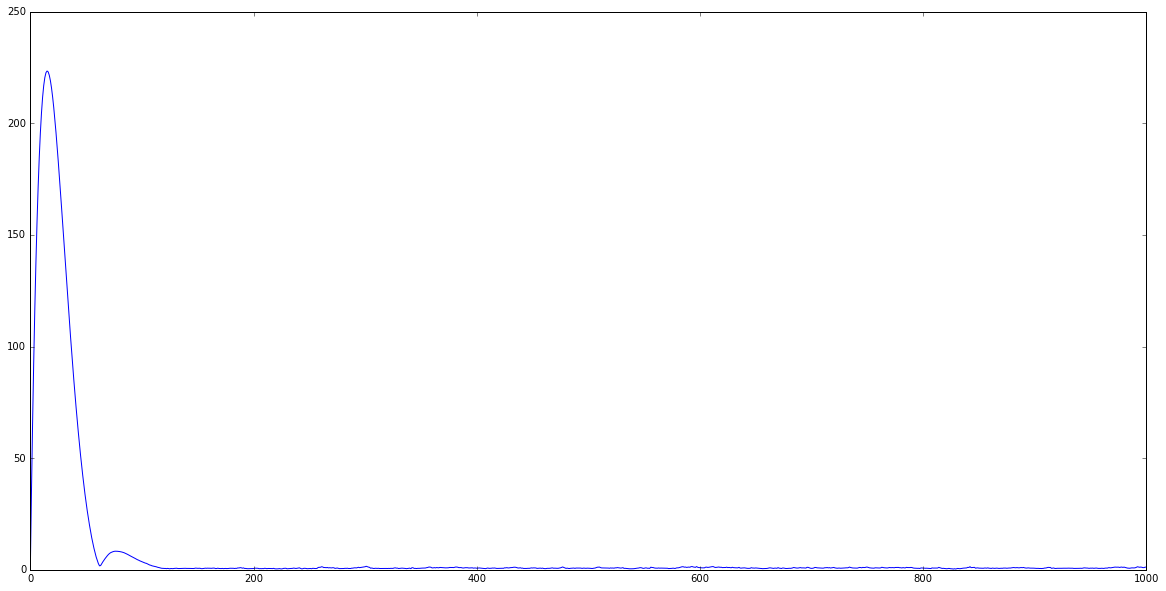

In [31]:
plt.figure(figsize=(20, 10))
#plt.plot(log_svm_SGD[1])
plt.plot(log_svm_SGD2[1])
plt.show()

In [32]:
W_svm_log = log_svm_SGD2[0]
data.groupby(by =data['event_id']).apply(lambda x: LL(x, features, W_svm_log)).mean()

array([-2.07495484])

In [33]:
data.groupby(by =data['event_id']).apply(lambda x: svm_distance(x, features, W_svm_log)).mean()

array([ 0.16750881])

In [34]:
for i in range(10):
    
    W1 = np.random.normal(loc =W_svm_log, scale =0.01, size =(len(features)))
    print data.groupby(by =data['event_id']).apply(lambda x: LL(x, features, W1)).mean()

[-2.08136962]
[-2.08807014]
[-2.09042788]
[-2.06627477]
[-2.07693591]
[-2.09101376]
[-2.07071023]
[-2.07312281]
[-2.06907216]
[-2.07238826]


In [42]:
%time log_svm_SGD3 = stochastic_gradient_descent_svm_log(data[data.is1], features, W_init =W_svm_log, moment=0.9)

C:\Users\User\Anaconda2\lib\site-packages\ipykernel\__main__.py:19: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Wall time: 4min 30s


In [47]:
W_svm_log = log_svm_SGD3[0]
print 'll is1   ',data.groupby(by =data.ix[data.is1,'event_id']).apply(lambda x: LL(x, features, W_svm_log)).mean()
print 'll oos   ',data.groupby(by =data.ix[data.oos,'event_id']).apply(lambda x: LL(x, features, W_svm_log)).mean()

ll is1    [-2.06818329]
ll oos    [-2.09025953]


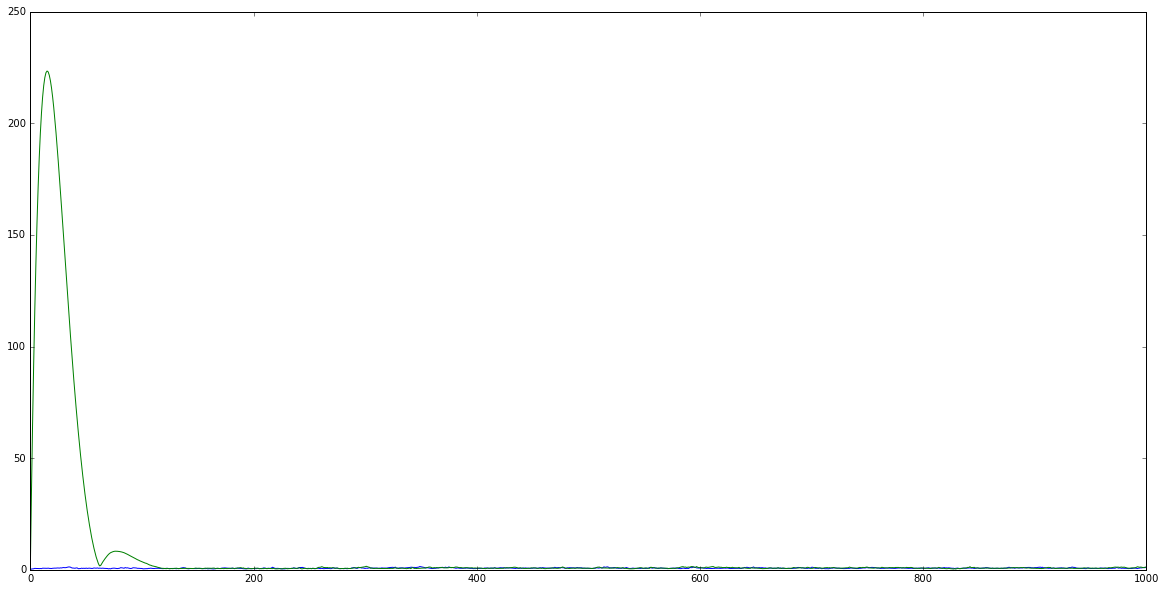

In [48]:
plt.figure(figsize=(20, 10))
plt.plot(log_svm_SGD3[1])
plt.plot(log_svm_SGD2[1])
plt.show()

In [50]:
W_svm_log = log_svm_SGD3[0]
print 'll is1   ',data.groupby(by =data.ix[data.is1,'event_id']).apply(lambda x: LL(x, features, W_svm)).mean()
print 'll oos   ',data.groupby(by =data.ix[data.oos,'event_id']).apply(lambda x: LL(x, features, W_svm)).mean()

ll is1    [-2.13126287]
ll oos    [-2.15772536]


In [49]:
log_svm_SGD3[0] - log_svm_SGD2[0]

array([  1.21152562e-03,   7.49524968e-04,   2.19149969e-04,
        -3.35204219e-04,  -9.24144008e-05,  -1.01176746e-04,
        -9.62159417e-04,   1.85582119e-04,   3.12323326e-04,
        -1.82080868e-03,  -3.80602588e-04,   4.20498748e-04,
        -6.86267344e-04,   1.84066765e-04,  -4.58505938e-04,
        -9.40545967e-05,   1.86038378e-04,  -1.17068572e-04,
        -4.76832067e-04,   1.53685749e-04,   5.34393602e-04,
        -1.88998573e-04,  -1.05308491e-03,   5.93709833e-05,
         1.61490952e-04,  -7.80395091e-06,   6.03021286e-04,
        -2.47121932e-05,   3.85122170e-04,   8.23188308e-04,
        -9.44987951e-04,  -2.50965706e-05,  -3.67116976e-04,
        -3.59568209e-05,   1.76818239e-04,  -3.60245017e-04,
        -2.66341309e-04,  -5.81460026e-04,   1.85434333e-04,
         1.25616481e-03,   3.03745286e-03,   2.69206371e-03,
        -1.19940049e-03,  -4.76834743e-04,   8.19437471e-04,
         1.18608397e-04,   2.46125561e-04,   8.27382890e-05,
         6.40997214e-04,

In [58]:
data.groupby(by =data['event_id']).apply(lambda x: np.log(svm_distance(x, features, W_svm_log))).mean()

array([-1.92054193])

In [59]:
for i in range(10):
    
    W1 = np.random.normal(loc =W_svm_log, scale =0.01, size =(len(features)))
    print data.groupby(by =data['event_id']).apply(lambda x: np.log(svm_distance(x, features, W1))).mean()

[-1.93949458]
[-1.92515709]
[-1.91183294]
[-1.9334154]
[-1.91623446]
[-1.92248936]
[-1.92739877]
[-1.91267932]
[-1.91516905]
[-1.91883063]
